# Binder Instructions

The Binder button will take you to a fully interactive Jupyter Lab environment, where you can execute some of the scripts found within this repository. At present, there are two data files in `galaxy_data/FCCtest_data/`. The first is a residual cube ready for spaxel by spaxel fitting, and the second is a cut-out of the original MUSE cube (FCC161) that the residual cube has been cut from.

## First steps

### Setup the directory of our working environment
When you first get this code package, we will want to setup the directory for the galaxies. The strucutre that is prefab from `scripts/other/directory_setup.py`, and reads galaxy names in from the `config/galaxy_info.yaml` file. These names will be used for the directory setup, keeping everything cleanly stored.

We are also going to run the `%matplotlib inline` command so that the plotted figures we see in the next section show without the need to scroll a small window.

In [ ]:
%run scripts/other/directory_setup.py

%matplotlib inline # changing the matplotlib config to plot inline.

# Spaxel-by-spaxel fitting of Residual Cube

To start the spaxel-by-spaxel fit for \[OIII] emission lines in the residual data cube, we use the MUSE_spaxel_fit.py script. It is located in `scripts/pne_analysis/`. This script reads in the residual cube: `galaxy_data/FCCtest_data/FCCtestcenter_residual_cube.fits` and performs a spaxel by spaxel fit for the \[OIII] 4959 5007 Å doublet. The detected PNe are saved in files that are ready for the next phase in PNe fitting. The script also saves plots that showcase the results of the spaxel-by-spaxel fit, including flux, signal to noise (A/rN) and highlighted potential PNe.

To run this script, we first need to provide it with some command line arguments:

```bash
--galaxy FCCtest  # This defines the galaxy name that we want to fit.
                  # (Required)

--loc center      # This defines the location of the datacube:
                  # e.g. with the Fornax3D survey, FCC161 had center, disk (middle) and halo pointings.
                  # Defaults to "center".

--fit             # This flag tells the script to perform the spaxel by spaxel fit,
                  # as sometimes you just want to extract the PNe, and not re-fit all spaxels.
                  # Default is False, use the flag to set to True.

--sep             # This flag tells the script to save the PNe minicubes in a fits file for futher analysis.
                  # Default is False, use the flag to set to True.
```

Using either an IPython console, or the Terminal, run the following commands:

```bash
# For ipython, run from the MUSE_PNe_fitting/ directory  (see below):
%run scripts/pne_analysis/MUSE_spaxel_fit.py --galaxy FCCtest --loc center --fit --sep

# For Terminal:
$ python scripts/pne_analysis/MUSE_spaxel_fit.py --galaxy FCCtest --loc center --fit --sep
```

Spaxel by Spaxel fit underway...
Fitting Spaxel by Spaxel for [OIII] doublet.
100%|██████████| 6561/6561 [00:34<00:00, 190.40it/s]
Cube fitted, data saved.
Plots saved in Plots/FCCtest
Number of detected [OIII] sources: 10
PNe minicubes saved to galaxy_data/FCCtest_data/FCCtestcenter


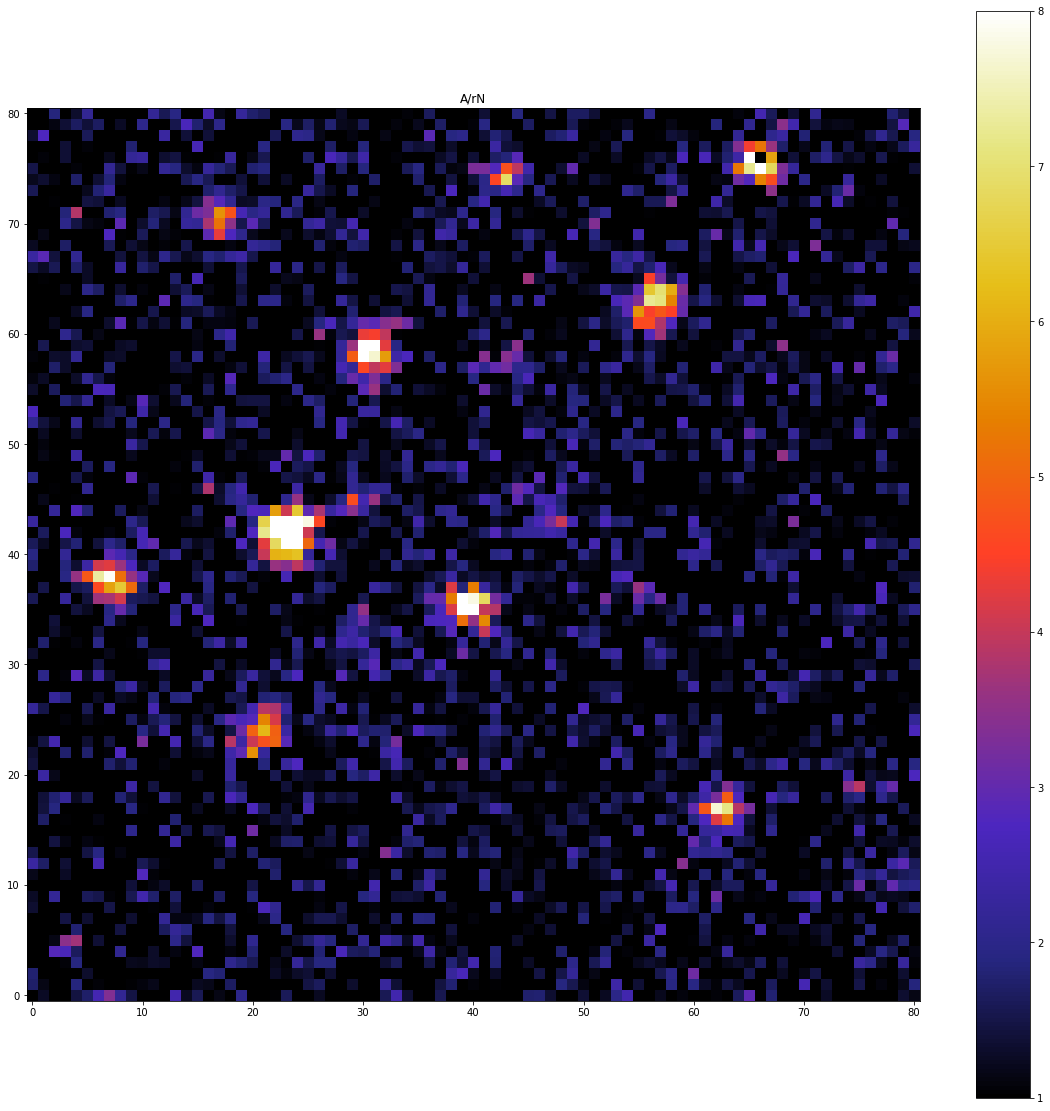

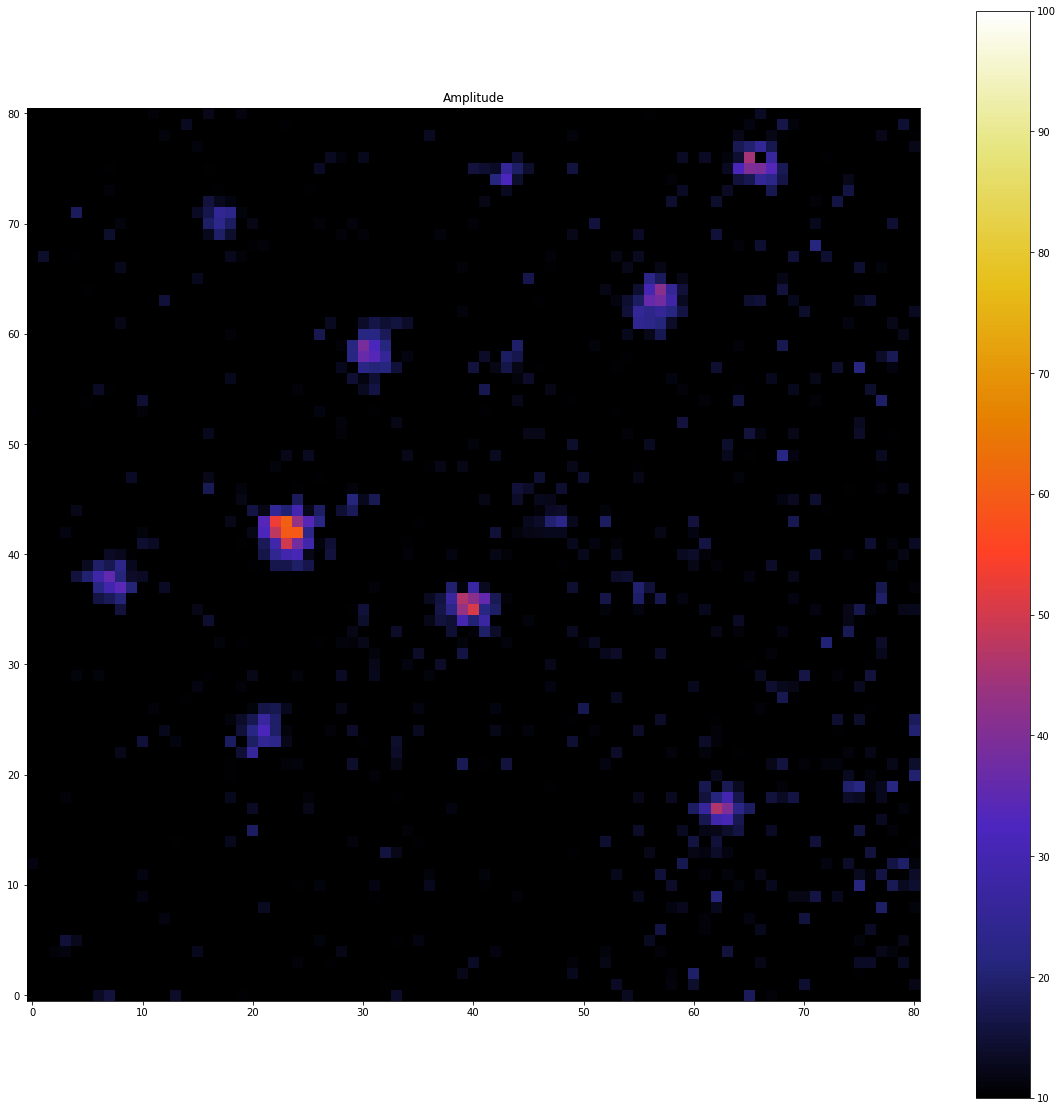

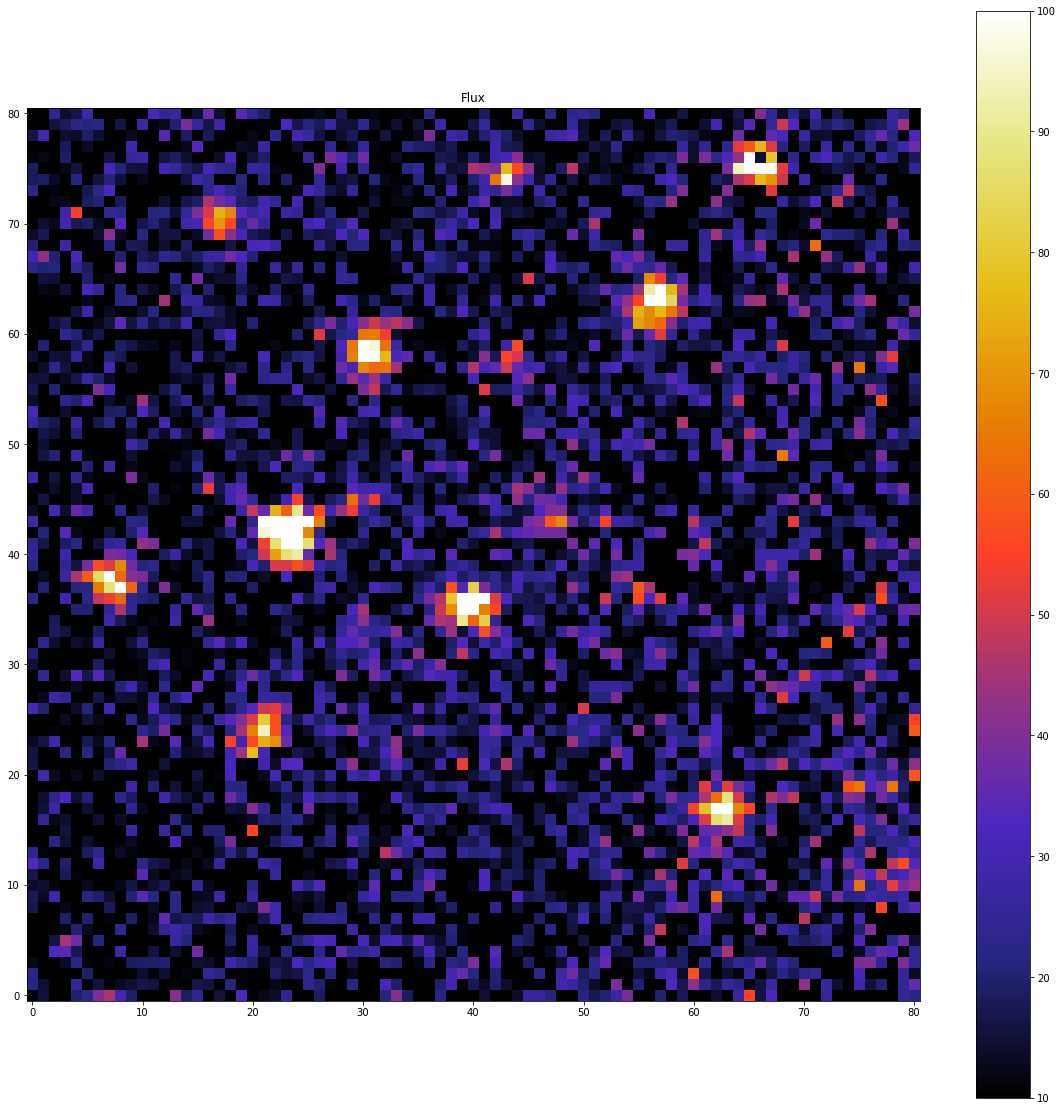

<Figure size 1440x1440 with 0 Axes>

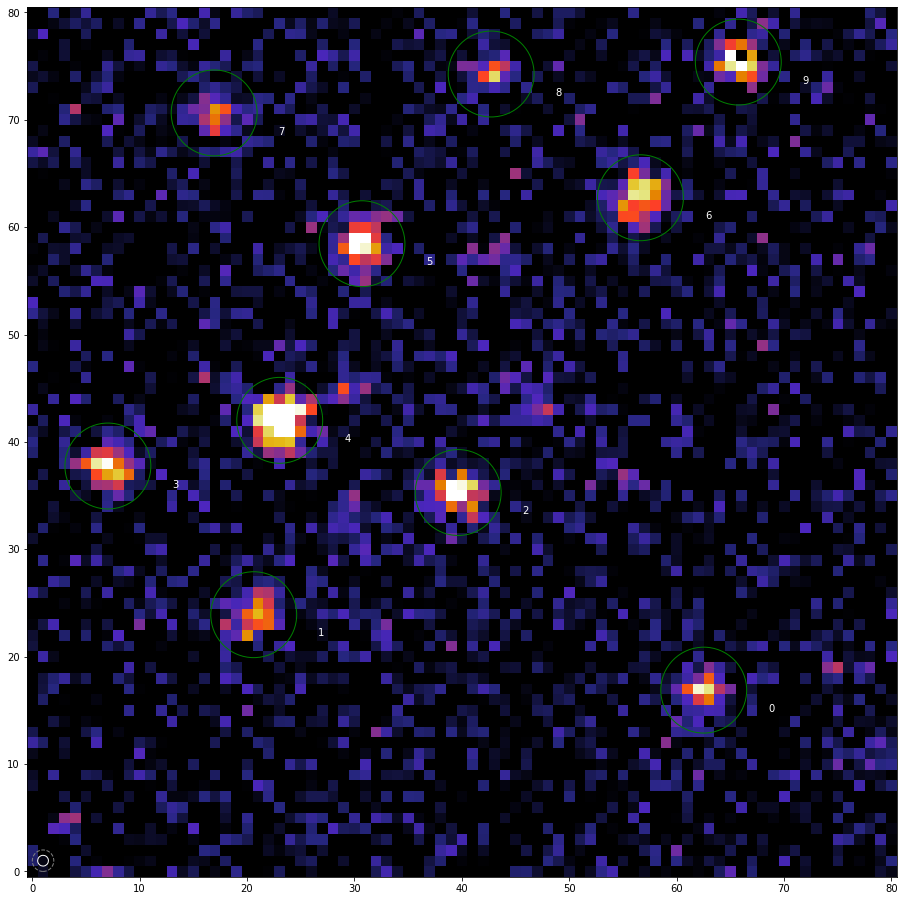

In [2]:
%run scripts/pne_analysis/MUSE_spaxel_fit.py --galaxy FCCtest --loc center --fit --sep

Once completed, you should be presented with four plots:

Amplitude over residual noise (A/rN) intensity map
Amplitude in OIII 5007 Å map
Flux in OIII 5007 Å map
A second A/rN map, though with detected OIII sources circled and numbered.
These plots will be saved into Plots/FCCtest/ for you to view whenever.

The primary output of scripts/pne_analysis/MUSE_spaxel_fit.py is a .fits file that contains the residual minicubes of the planetary nebulae. This file will be utilised by the next script to fit, filter and analyse the sources for PNe identification.

# Fitting the Planetary Nebulae with the 1D+2D modelling technique

Now that the unresovled point sources in \[OIII] 5007 $Å$ have been identified and extracted, we can move onto fitting their emission peak profile, allowing us to model their total flux and apparent magnitude, in \[OIII]. These values can later be used for distance determination and Planetary Nebulae Luminosity Function (PNLF) construction.

To run the PNe fitting script, we need to specify another set of flags:

```bash
--galaxy FCCtest  # This defines the galaxy name that we want to fit.
                  # (Required)

--loc center      # This defines the location of the datacube:
                  # e.g. with the Fornax3D survey, FCC167 had center, disk and halo pointings.
                  # Defaults to "center".

--fit_psf         # This tells the script to fit for the PSF, using the 5-7 brightest sources,
                  # in signal to noise, for the best fit parameters.
                  # Default is False, use the flag to set to True.

--save_gist       # For when we want to analyse the raw spectrum of the sources, 
                  # we save PNe minicubes to run them through a custom GIST routine for impostor identification.
                  # Default is False, use the flag to set to True.
                  # (Not required, NOT WORKING IN BINDER)
```

Then, again, either using the Ipython console, or Terminal:

```bash
# For ipython, run from the MUSE_PNe_fitting/ directory:
%run scripts/pne_analysis/PNe_fitting.py --galaxy FCCtest --loc center --fit_psf

# For Terminal:
$ python scripts/pne_analysis/PNe_fitting.py --galaxy FCCtest --loc center --fit_psf
```

In [1]:
%run scripts/pne_analysis/PNe_fitting.py --galaxy FCCtest --loc center --fit_psf

FileNotFoundError: [Errno 2] No such file or directory: 'exported_data/FCCtest/FCCtestcenter_PNe_x_y_list.npy'

The distance estimation here, assuming the brightest source of \[OIII] is at the bright end of the PNLF, will be incorrect, due to the limited number of sources present. (Please see introductory paper about this tehcnique and analysis of NGC1380 and NG1404, [Spriggs, T. W. et al. 2020](https://ui.adsabs.harvard.edu/abs/2020A%26A...637A..62S/abstract))

Congratulations! You have now run both scripts, firstly for spaxel by spaxel fitting nebulous \[OIII] 5007 \AA{} emission lines, within residual (stellar continuum subtracted) MUSE data, detecting the presence of unresolved point sources in \[OIII] 5007 Å. The second script then fits the sources and filters out sources that do not meet a set criteria. Those sources that pass this filer are then fitted with our novel 1D+2D modelling technique enclosed herein, [see Spriggs, T. W. et al. 2020](https://ui.adsabs.harvard.edu/abs/2020A%26A...637A..62S/abstract).

Any suggestions are welcome for progressing this method, or queries on how to run it with your data. Please see the rest of the README for information about data requirements.